Mesh Parameterization
=====================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This tour explores 2-D parameterization of 3D surfaces using linear methods.


A  review paper for mesh parameterization can be found in:


M.S. Floater and K. Hormann,
_Surface Parameterization: a Tutorial and Survey_
in Advances in multiresolution for geometric modelling, p. 157-186, 2005.


See also:


K. Hormann,  K. Polthier and A. Sheffer
_Mesh parameterization: theory and practice,_
Siggraph Asia Course Notes

In [2]:
using PyPlot
using NtToolBox 

Conformal Laplacian
-------------------
The conformal Laplacian uses the cotan weights to obtain an accurate
discretization of the Laplace Beltrami Laplacian.


They where first introduces as a linear finite element approximation of the
Laplace-Beltrami operator in:


U. Pinkall and K. Polthier,
_Computing discrete minimal surfaces and their conjugates_
Experimental Mathematics, 2(1):15-36, 1993.


First load a mesh. The faces are stored in a matrix $F = (f_j)_{j=1}^m \in \RR^{3 \times m}$
of $m$ faces $f_j \in \{1,\ldots,n\}^3$. The position of the vertices are
stored in a matrix $X  = (x_i)_{i=1}^n \in \RR^{3 \times n}$ of $n$ triplets of points
$x_k \in \RR^3$

In [3]:
X, F = read_mesh("NtToolbox/src/data/nefertiti.off")
n = size(X,2);

In order to perform mesh parameterization, it is important that this mesh
has the topology of a disk, i.e. it should have a single B.


First we compute the boundary $B = (i_1,\ldots,i_p)$ of the mesh.
By definition, for the edges $(i_k,i_{k+1})$, there is a single adjacent face $
(i_k,i_{k+1},\ell) $.

In [4]:
B = compute_boundary(F);

Length of the boundary.

In [5]:
p = length(B);

Display the boundary.

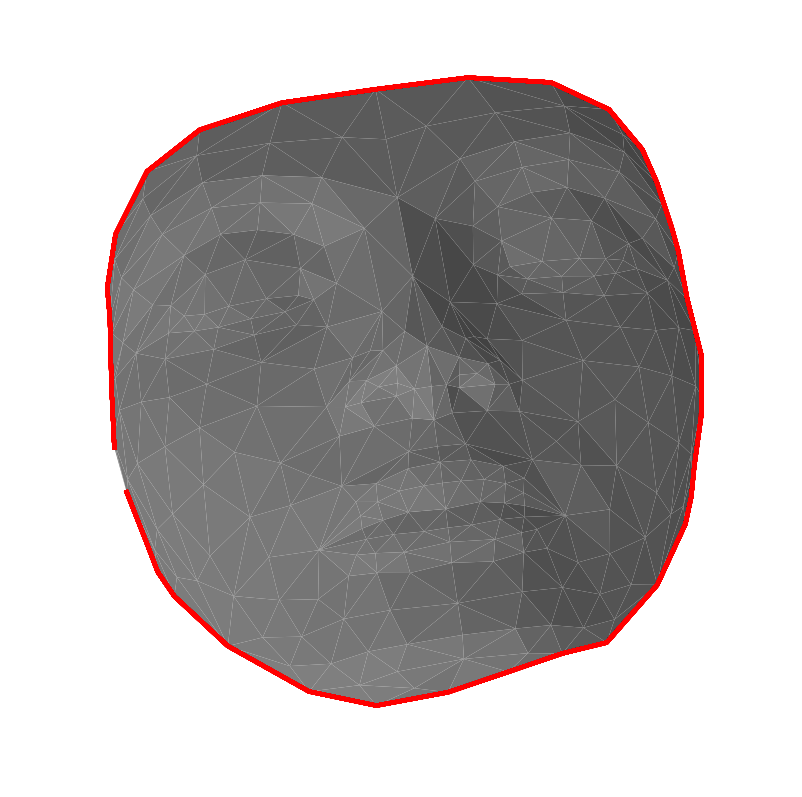

In [6]:
figure(figsize=(10,10))
#plot mesh
plot_mesh(X, F, el=80,az=-100, lwdt=.6, dist=6)

#plot boundary
for i in 1:length(B)
    plot(X[1,B], X[2,B], X[3,B], color="red", lw=3)
end

The conformal Laplacian weight matrix $W \in \RR^{n \times n}$ is
defined as
$$ W_{i,j} =
      \choice{
          \text{cotan}(\al_{i,j}) + \text{cotan}(\be_{i,j})
          \qifq i \sim j \\
          \quad 0 \quad \text{otherwise}.
      }
$$
Here, $i \times j$ means that there exists two faces
$ (i,j,k) $ and $ (i,j,\ell) $ in the mesh (note that for B
faces, one has $k=\ell$).


The angles are the angles centered as $k$ and $\ell$, i.e.
$$ \al_{i,j} = \widehat{x_i x_k x_j }
  \qandq
  \be_{i,j} = \widehat{x_i x_\ell x_j }. $$


Compute the conformal 'cotan' weights.
Note that each angle $\alpha$ in the mesh contributes with
$1/\text{tan}(\alpha)$ to the weight of the opposite edge.
We compute $\alpha$ as
$$ \alpha = \text{acos}\pa{ \frac{\dotp{u}{v}}{\norm{u}\norm{v}} } $$
where $u \in \RR^3, v \in \RR^3$ are the edges of the adjacent vertices
that defines $\al$.

In [7]:
W = spzeros(n,n)

for i in 1:3
    i2 = i%3+1
    i3 = (i+1)%3+1
    u = X[:,F[i2,:]] - X[:,F[i,:]]
    v = X[:,F[i3,:]] - X[:,F[i,:]]
    # normalize the vectors   
    u = u ./ repeat(sqrt(sum(u.^2,1)), outer=(3,1))
    v = v ./ repeat(sqrt(sum(v.^2,1)), outer=(3,1))
    # compute angles
    alpha = 1./tan(acos(sum(u.*v, 1)))
    alpha = vec(max(alpha, 1e-2)') #avoid degeneracy
    W = W + sparse(F[i2,:],F[i3,:], alpha, n,n)
    W = W + sparse(F[i3,:],F[i2,:], alpha, n,n)
end;

Compute the symmetric Laplacian matrix
$L = D-W$ where $D = \mathrm{Diag}_i\pa{\sum_j W_{i,j}}$

In [8]:
d = sum(W,1)
D = spdiagm(vec(d), 0,n,n)
L = D - W;

Fixed Boundary Harmonic Parameterization
----------------------------------------
The problem of mesh parameterization corresponds to finding
2-D locations $(y_i = (y_i^1,y_i^2) \in \RR^2$
for each original vertex, where $ Y = (y_i)_{i=1}^n \in \RR^{2 \times n} $
denotes the flattened positions.


The goal is for this parameterization to be valid, i.e. the 2-D
mesh obtained by replacing $X$ by $Y$ but keeping the same face connectivity $F$
should not contained flipped faces (all face should have the same orientation in the plane).



We consider here a linear methods, that finds the parameterization, that
impose that the coordinates are harmonic inside the domain, and have
fixed position on the boundary (Dirichlet conditions)
$$ \forall s=1,2, \quad \forall i \notin B, \quad (L y^s)_i = 0,
\qandq \forall j \in B, \quad y^s_j = z_j^s. $$


In order for this method to define a valid parameterization, it is
necessary that the fixed position $ z_j = (z^1_j,z^2_j) \in \RR^2 $
are consecutive points along a convex polygon.


Compute the fixed positions $Z=(z_j)_j$ for the vertices on $B$.
Here we use a circle.

In [9]:
p = length(B)
t = collect(linspace(0,2*pi,p+1))
deleteat!(t,p+1)
Z = [cos(t)'; sin(t)'];

Computing the parameterization requires to solve two independent linear
system
$$ \forall s=1,2, \quad  L_1 y^s = r^s $$
where $L_1$ is a modified Laplacian, the is obtained from $L$ by
$$ \choice{
      \forall i \notin B, \quad (L_0)_{i,j} = L_{i,j} \\
      \forall i \in B, \quad (L_0)_{i,i}=1, \\
      \forall i \in B, \forall j \neq i, \quad (L_0)_{i,i}=0,
  } $$
i.e. replacing each row indexed by $B$ by a 1 on the diagonal.

In [10]:
L1 = copy(L)
L1[B,:] = 0
for i in 1:length(B)
    L1[B[i], B[i]] = 1
    end;

Set up the right hand size $R$ with the fixed position.

In [11]:
R = zeros(2,n)
R[:,B] = Z;

Solve the two linear systems.

In [12]:
Y = zeros(2,n)
Y = (L1 \ R')';

# Display the parameterization.

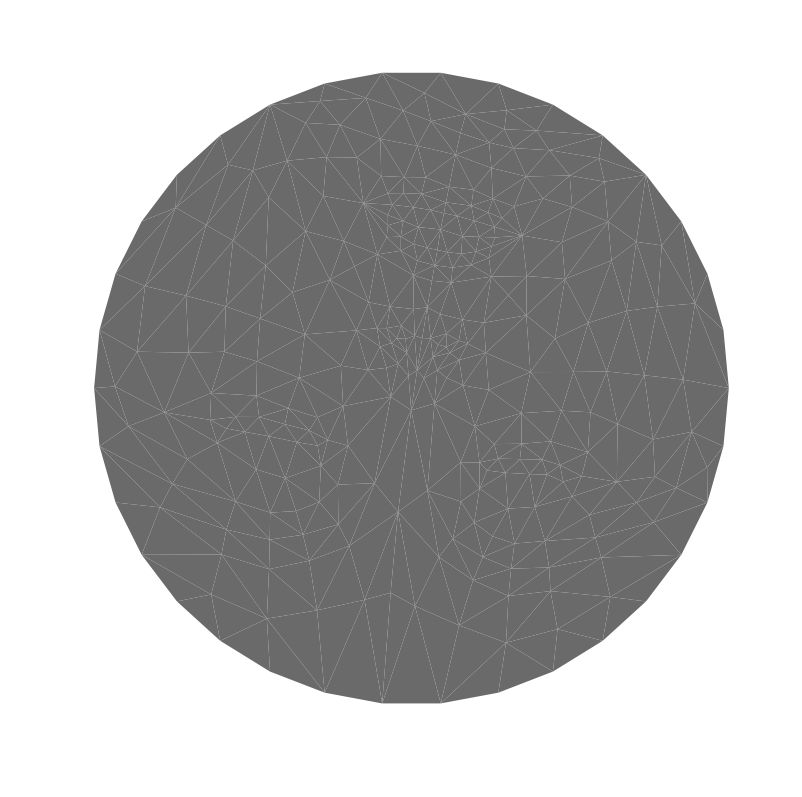

In [13]:
figure(figsize=(10,10))
plot_mesh([Y;zeros(1,n)],F, lwdt = 1., c="lightgrey");

Mesh Parameterization on a Square
---------------------------------
One can perform a fixed B parameterization on a square.
This is useful to compute a geometry image (a color image storring the
position of the vertices).

__Exercise 1__

Compute the fixed positions $Z$ of the points indexed by $B$ that are along a
square. Warning: $p$ is not divisible by 4.

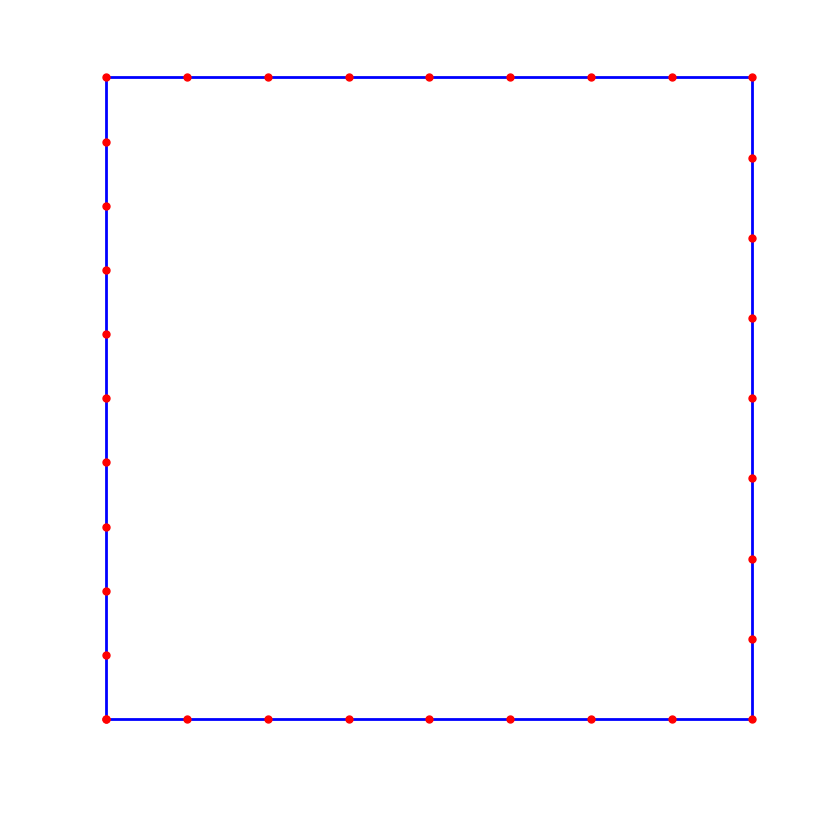

In [14]:
include("NtSolutions/meshdeform_1_parameterization/exo1.jl");

In [15]:
## Insert your code here.

__Exercise 2__

Compute the parameterization $Y$ on a square.

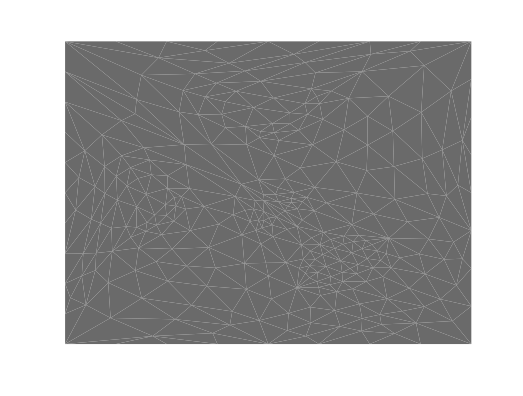

In [16]:
include("NtSolutions/meshdeform_1_parameterization/exo2.jl");

# Insert your code here.

__Exercise 3__

Shift the $B$ positions so that the eyes of the model are approximately
horizontal.

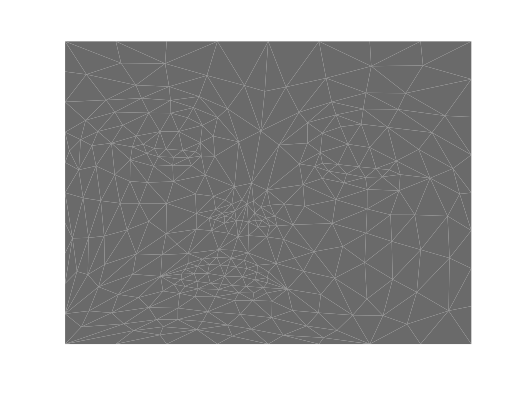

In [17]:
include("NtSolutions/meshdeform_1_parameterization/exo3.jl");

In [18]:
## Insert your code here.

Re-align the Texture
--------------------
To map correctly a real image on the surface, the texture needs to be aligned.
We use here a simple affine mapping to map the eye and mouth of the image
on the corresponding location on the surface.


Load a texture image $T$.

In [19]:
n1 = 256
T = load_image("NtToolBox/src/data/lena.png", n1)
T = T[n1:-1:1,:];

In [22]:
C = rand(1000,3)
C = C./repeat(sum(C,2),outer=(1,3))
C=C[:,[3,2,1]]
C= sortcols(C)
lambd=C';

Display the texture on the mesh, using the parametrization of the mesh as
texture coordinates.

In [23]:
fig = figure(figsize = (10,10))
ax = subplot(111, projection="3d")

x = collect(linspace(0, 1, size(T,1)))
#itp = interpolate(T', BSpline(Cubic(Line())), OnGrid())
itp = interpolate((x,x), T', Gridded(Linear()))

for i in 1:size(F,2)
    px = Y[1,F[:,i]]
    py = Y[2,F[:,i]]
    
    points_x = lambd'*px
    points_y = lambd'*py
    points = [points_x ; points_y]

    col = zeros(size(points_x))
    for ind in 1:size(points_x,1)
        col[ind] = itp[points_x[ind], points_y[ind]]
    end
    col = rescale(col)
    col = repeat(col,outer=(1,3))
    
    Px = X[1,F[:,i]]
    Py = X[2,F[:,i]]
    Pz = X[3,F[:,i]]
    
    Points_x = lambd'*Px
    Points_y = lambd'*Py
    Points_z = lambd'*Pz

    scatter3D(Points_x,Points_y,Points_z,s=5,c=col,lw=0,alpha=1)
    ax[:view_init](80, -100)
    axis("off")
    ax[:dist]=6

end

LoadError: UndefVarError: interpolate not defined

Position $(u_1,u_2,u_3)$ of the eyes and the mouth in the texture.

In [311]:
u1 = [247,266]*n1/512.
u2 = [247,328]*n1/512.
u3 = [161,301]*n1/512.;

Display.

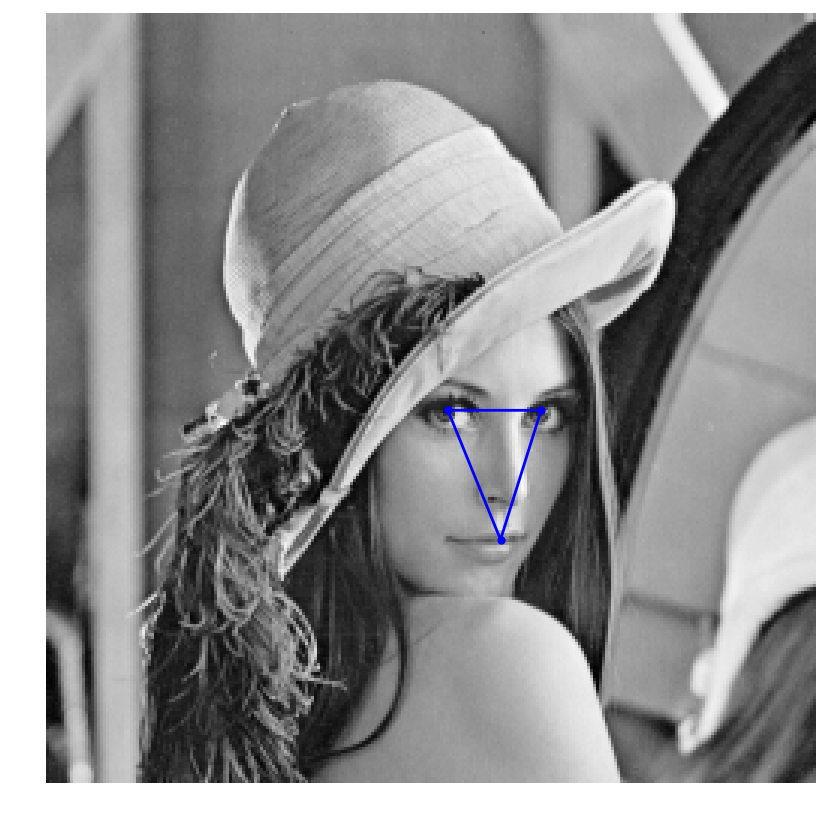

In [312]:
figure(figsize=(10,10))
imageplot(T)
plot([u1[2],u2[2],u3[2],u1[2]], [u1[1],u2[1],u3[1],u1[1]], ".-b", ms=10, linewidth=2)
gca()[:invert_yaxis]()

Positions $(v_1,v_2,v_3)$ of the eyes and the mouth on the parameteric domain

In [313]:
v1 = [310,125]*n1/512.
v2 = [315,350]*n1/512.
v3 = [105,232]*n1/512.;

Display.

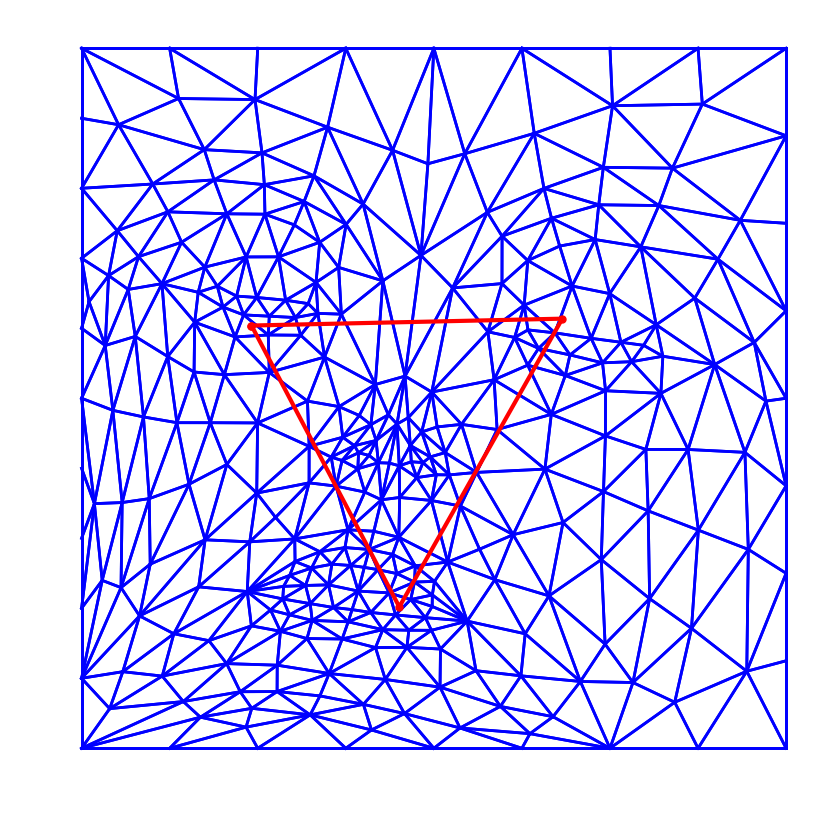

In [314]:
figure(figsize=(10,10))
axis("off")

Y_big = Y*(n1-1) + 1
beg = findn(W)[1]
last = findn(W)[2]

for i in 1:length(beg)
    plot([Y_big[1, beg[i]], Y_big[1,last[i]]],[Y_big[2,beg[i]], Y_big[2,last[i]]],c="blue",lw=2)
end

plot([v1[2],v2[2],v3[2],v1[2]], [v1[1],v2[1],v3[1],v1[1]], ".-r", ms=10, linewidth=3);

Apply a similitude to the image so that the mouth and the eye have the correct position in parametric domain.

In [315]:
T1 = perform_image_similitude(T,"affine",(u1-1)/n1,(v1-1)/n1,(u2-1)/n1,(v2-1)/n1,(u3-1)/n1,(v3-1)/n1);

Display the mesh with the image overlaid.

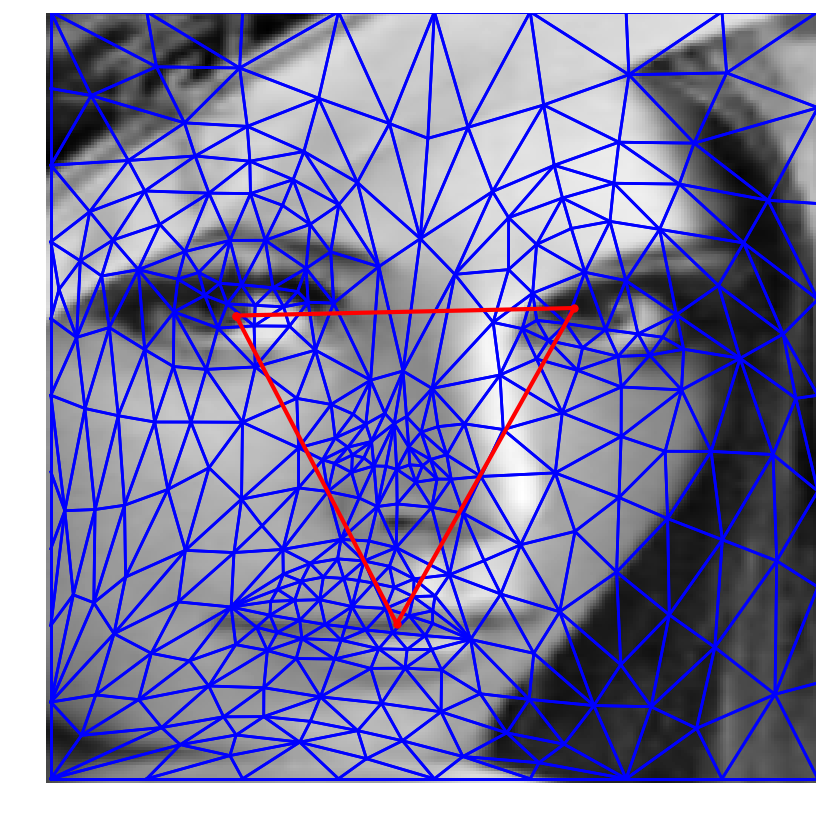

In [316]:
figure(figsize=(10,10))
axis("off")

Y_big = Y*(n1-1) + 1
beg = findn(W)[1]
last = findn(W)[2]

for i in 1:length(beg)
    plot([Y_big[1, beg[i]], Y_big[1,last[i]]],[Y_big[2,beg[i]], Y_big[2,last[i]]],c="blue",lw=2)
end

plot([v1[2],v2[2],v3[2],v1[2]], [v1[1],v2[1],v3[1],v1[1]], ".-r", ms=10, linewidth=3)
imageplot(T1)
gca()[:invert_yaxis]()

Display the texture mapped mesh.

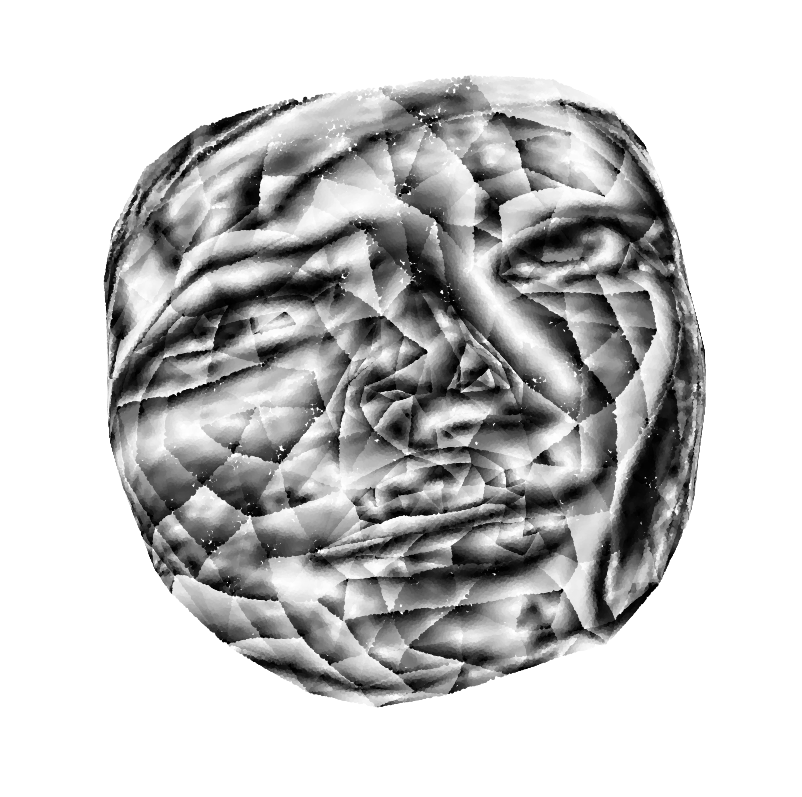

In [317]:
fig = figure(figsize = (10,10))
ax = subplot(111, projection="3d")

x = collect(linspace(0, 1, size(T,1)))
itp = interpolate((x,x), T1', Gridded(Linear()))

for i in 1:size(F,2)
    px = Y[1,F[:,i]]
    py = Y[2,F[:,i]]
    
    points_x = lambd'*px
    points_y = lambd'*py
    points = [points_x ; points_y]

    col = zeros(size(points_x))
    for ind in 1:size(points_x,1)
        col[ind] = itp[points_x[ind], points_y[ind]]
    end
    col = rescale(col)
    col = repeat(col,outer=(1,3))
    
    Px = X[1,F[:,i]]
    Py = X[2,F[:,i]]
    Pz = X[3,F[:,i]]
    
    Points_x = lambd'*Px
    Points_y = lambd'*Py
    Points_z = lambd'*Pz

    scatter3D(Points_x,Points_y,Points_z,s=6,c=col,lw=0,alpha=1)
    ax[:view_init](80, -100)
    axis("off")
    ax[:dist]=6

end